# Practical 3: MNIST

**Shuyue Wang, Yiwen Wang**


This is the first task of Practical 3. Your task is to build a (convolutional) neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 

You should get an accuracy of **at least 97%** to pass the practical. 

You should save and upload your model to the seafile link we provided to you. Please name the model file as `{repository_name}-MNIST.h5`. For example, if your repository is FDS21-M0, you should name the model file as `FDS21-M0-MNIST.h5`

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.7.0'

In [3]:
tf.keras.__version__

'2.7.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

11501568/11490434 [==============================] - 1s 0us/step


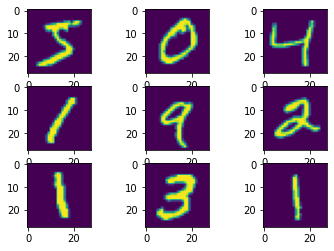

(60000, 28, 28)

In [4]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

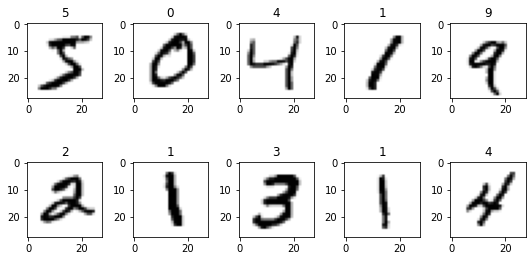

In [9]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

def image_plot(X, y, num=10):
    # plot data
    num_row = 2
    num_col = 5

    images = X[:num]
    labels = y[:num]

    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray_r')
        ax.set_title('{}'.format(class_names[labels[i]]))
    plt.tight_layout()
    plt.show()

image_plot(X_train_full, y_train_full)

In [10]:
# reshape dataset to have a single channel
X_train_full = X_train_full.reshape((X_train_full.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# one-hot encoding
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0

# get validation dataset
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

## Build and train the model

Build and train your model. 

In [24]:
# TODO: Build your model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", kernel_initializer='he_uniform', padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(), # starting fully connected layers
    keras.layers.Dense(128, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])


In [13]:
# show the structure of your model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 256)        

In [26]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [27]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=32, epochs=30, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping_cb])

Epoch 1/30
1719/1719 [==============================] - 379s 220ms/step - loss: 0.7452 - accuracy: 0.7467 - val_loss: 0.0832 - val_accuracy: 0.9824
Epoch 2/30
1719/1719 [==============================] - 372s 216ms/step - loss: 0.2151 - accuracy: 0.9335 - val_loss: 0.0538 - val_accuracy: 0.9884
Epoch 3/30
1719/1719 [==============================] - 370s 215ms/step - loss: 0.1418 - accuracy: 0.9599 - val_loss: 0.0590 - val_accuracy: 0.9882
Epoch 4/30
1719/1719 [==============================] - 371s 216ms/step - loss: 0.1028 - accuracy: 0.9727 - val_loss: 0.0583 - val_accuracy: 0.9882
Epoch 5/30
1719/1719 [==============================] - 377s 219ms/step - loss: 0.0860 - accuracy: 0.9786 - val_loss: 0.0663 - val_accuracy: 0.9854
Epoch 6/30
1719/1719 [==============================] - 366s 213ms/step - loss: 0.0677 - accuracy: 0.9830 - val_loss: 0.0573 - val_accuracy: 0.9872
Epoch 7/30
1719/1719 [==============================] - 377s 220ms/step - loss: 0.0649 - accuracy: 0.9851 - val_

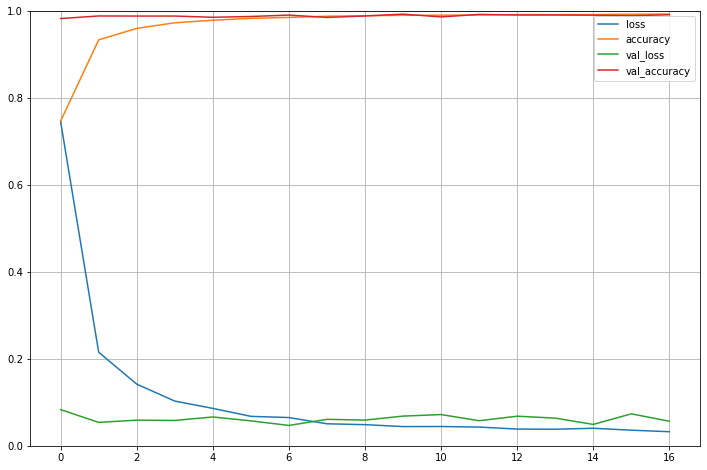

In [28]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the seafile link we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [29]:
model.save('FDS21-M101-MNIST.h5') # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [31]:
model = keras.models.load_model("FDS21-M101-MNIST.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 17s 54ms/step - loss: 0.0414 - accuracy: 0.9910


[0.041354622691869736, 0.9909999966621399]

## Short report

Please write a few sentences explaining how you build and train the model. Please include the decisions you made, such as why you use x number layers, and the difficulties you met. 

Since the task is image recognition, we firstly researched some paper focusing on the topic. We then found out that CNN is a powerful model applied in many recognition tasks. So we decided to use CNN as our model, then we tried to find different number of layers. 
1. We firstly tried three convolutional layers and one dropout layer. However, the accuracy did not reach 97% for testing data set. 
2. Then we tried different learning rate and found out the result did not change a lot. Thus, we thought that the model may not be powerful to handle with this problem and we decided to start from the basic structure of CNN we learned from the paper. 
After step 2, the accuracy successfully reached above 97% in testing data set. Meanhwhile, the graph about loss and accuracy also showed that the model converged after 30 epoches and not overfiting.
So the difficulties are:
1. How to establish a good model quickly? Academic reseach is necessary.
2. How to decide the values of hyperparameters? For CNN, use established model is more appropriate.